In the name of Allah

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
import pandas as pd

In [4]:
DATA_DIR = 'drive/MyDrive/Courses/AISC/BTC-USD.csv'
FUTURE = 3
SEQ_LEN = 60
VAL_RATIO = 0.05

In [164]:
df = pd.read_csv(DATA_DIR, names=['time', 'low', 'high', 'open', 'close', 'volume'])
df

,time,low,high,open,close,volume
0,1528968660,6489.549805,6489.560059,6489.560059,6489.549805,0.587100
1,1528968720,6487.370117,6489.560059,6489.549805,6487.379883,7.706374
2,1528968780,6479.410156,6487.370117,6487.370117,6479.410156,3.088252
3,1528968840,6479.410156,6479.419922,6479.419922,6479.410156,1.404100
4,1528968900,6475.930176,6479.979980,6479.410156,6479.979980,0.753000
...,...,...,...,...,...,...
97719,1535214960,6712.990234,6713.140137,6713.000000,6713.140137,0.769891
97720,1535215020,6713.339844,6715.000000,6715.000000,6714.520020,1.002652
97721,1535215080,6714.509766,6714.520020,6714.520020,6714.520020,1.021925
97722,1535215140,6714.520020,6715.000000,6714.520020,6715.000000,3.645508


In [165]:
df = df[['close', 'volume']]
df.tail()

,close,volume
97719,6713.140137,0.769891
97720,6714.520020,1.002652
97721,6714.520020,1.021925
97722,6715.000000,3.645508
97723,6715.000000,0.513560


In [166]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(97724, 2)
(97724, 2)


<ipython-input-166-dd560b5afcc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [30]:
import matplotlib.pyplot as plt

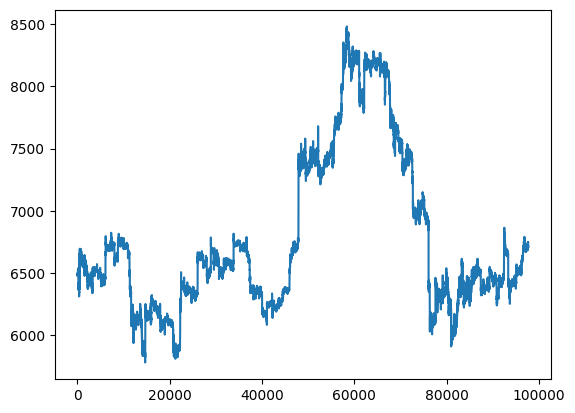

In [ ]:
plt.plot(df['close'])

In [167]:
df['future'] = df['close'].shift(-FUTURE)
df.tail()

<ipython-input-167-1702e695c3d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['future'] = df['close'].shift(-FUTURE)


,close,volume,future
97719,6713.140137,0.769891,6715.0
97720,6714.520020,1.002652,6715.0
97721,6714.520020,1.021925,NaN
97722,6715.000000,3.645508,NaN
97723,6715.000000,0.513560,NaN


In [168]:
df.dropna(inplace=True)
df.tail()

<ipython-input-168-0a18aee3a3b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,close,volume,future
97716,6708.379883,0.975295,6713.140137
97717,6710.089844,1.293573,6714.520020
97718,6712.990234,2.330975,6714.520020
97719,6713.140137,0.769891,6715.000000
97720,6714.520020,1.002652,6715.000000


In [169]:
df['target'] = list(map(lambda now, future : 1 if future > now else 0, df['close'], df['future']))

df.head()

<ipython-input-169-139af0c4426f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = list(map(lambda now, future : 1 if future > now else 0, df['close'], df['future']))


,close,volume,future,target
0,6489.549805,0.587100,6479.410156,0
1,6487.379883,7.706374,6479.979980,0
2,6479.410156,3.088252,6480.000000,1
3,6479.410156,1.404100,6477.220215,0
4,6479.979980,0.753000,6480.000000,1


In [170]:
df.drop('future', axis=1, inplace=True)

<ipython-input-170-a3e7caea5251>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('future', axis=1, inplace=True)


In [79]:
from sklearn.preprocessing import StandardScaler

In [171]:
for col in df.columns:
    if col != 'target':
        df[col] = df[col].pct_change()
        df[col].dropna(inplace=True)

df.dropna(inplace=True)
df.tail()

<ipython-input-171-f0bebfcdaec0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].pct_change()
<ipython-input-171-f0bebfcdaec0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].dropna(inplace=True)
<ipython-input-171-f0bebfcdaec0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,close,volume,target
97716,0.000042,-0.304025,1
97717,0.000255,0.326340,1
97718,0.000432,0.801966,1
97719,0.000022,-0.669713,1
97720,0.000206,0.302330,1


In [172]:
df.head()

,close,volume,target
1,-0.000334,12.126169,0
2,-0.001228,-0.599260,1
3,0.000000,-0.545342,0
4,0.000088,-0.463713,1
5,0.000003,0.979947,0


In [173]:
df.shape

(97720, 3)

In [ ]:
import math

In [174]:
data_len = math.floor(len(df) - SEQ_LEN) + 1
val_len = int(data_len * VAL_RATIO)
data_len, val_len

(97661, 4883)

In [175]:
val_len_row_num = val_len - 1 + SEQ_LEN
val_len_row_num

4942

In [176]:
scaler = StandardScaler()

data_train_nrm = scaler.fit_transform(df.values[:-val_len_row_num, :2])
data_val_nrm = scaler.transform(df.values[-val_len_row_num:, :2])

data = np.concatenate((data_train_nrm, data_val_nrm), 0)

In [177]:
data_train_nrm.std(0), data_train_nrm.mean(0).round(2)

(array([1., 1.]), array([-0., -0.]))

In [179]:
data = np.concatenate((data, df.values[:, 2].reshape(-1, 1)), 1)
data.shape

(97720, 3)

In [13]:
from collections import deque

In [15]:
import numpy as np

In [180]:
box = deque(maxlen=SEQ_LEN)
boxes = []

for smp in data:
    box.append(smp[:-1])
    if len(box) == SEQ_LEN:
        boxes.append([np.array(box), smp[-1]])

len(boxes)

97661

In [181]:
data_train = boxes[:-val_len]
data_val = boxes[-val_len:]

In [21]:
from sklearn.utils import shuffle

In [182]:
def equalize(data):
    buys = []
    sells = []
    for box, target in data:
        if target == 1:
            buys.append(box)
        else:
            sells.append(box)

    lower = min(len(buys), len(sells))
    print(lower)

    buys = shuffle(buys)
    sells = shuffle(sells)

    x_eq = np.array(buys[:lower]+ sells[:lower])
    y = np.array([1] * lower + [0] * lower).reshape((-1, 1))

    return shuffle(x_eq, y)

In [183]:
x_train, y_train = equalize(data_train)
x_val, y_val = equalize(data_val)

41582
2265


In [184]:
N_SMP_TRAIN = 10000
N_SMP_VAL = 500

In [185]:
x_train_s = x_train[:N_SMP_TRAIN]
y_train_s = y_train[:N_SMP_TRAIN]
x_val_s = x_val[:N_SMP_VAL]
y_val_s = y_val[:N_SMP_VAL]

In [186]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((83164, 60, 2), (83164, 1), (4530, 60, 2), (4530, 1))

In [187]:
x_train_s.shape, y_train_s.shape, x_val_s.shape, y_val_s.shape

((10000, 60, 2), (10000, 1), (500, 60, 2), (500, 1))

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, CuDNNLSTM

In [188]:
units = [(64, 128, 256), (128, 256, 512)]

In [189]:
def get_model(u):
  model = Sequential()

  model.add(CuDNNLSTM(u[0], input_shape=x_train.shape[1:], return_sequences=True))
  model.add(Dropout(0.2))

  model.add(CuDNNLSTM(u[1], return_sequences=True))
  model.add(Dropout(0.2))

  model.add(CuDNNLSTM(u[2]))
  model.add(Dropout(0.2))

  model.add(Dense(32))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
  return model

In [27]:
from keras.callbacks import EarlyStopping

In [190]:
for u in units:
  model = get_model(u)
  results = model.fit(x_train_s, y_train_s, epochs=10, batch_size=64, validation_data=(x_val_s, y_val_s),
                      callbacks=EarlyStopping(patience=5, restore_best_weights=True), verbose=0)
  print(u, model.evaluate(x_val_s, y_val_s))

16/16 [==============================] - 0s 14ms/step - loss: 0.6877 - accuracy: 0.5680
(64, 128, 256) [0.6876774430274963, 0.5680000185966492]
16/16 [==============================] - 0s 10ms/step - loss: 0.6857 - accuracy: 0.5600
(128, 256, 512) [0.6856978535652161, 0.5600000023841858]


In [191]:
units = [(128, 128, 128), (256, 256, 256)]

In [192]:
for u in units:
  model = get_model(u)
  results = model.fit(x_train_s, y_train_s, epochs=10, batch_size=64, validation_data=(x_val_s, y_val_s),
                      callbacks=EarlyStopping(patience=5, restore_best_weights=True), verbose=0)
  print(u, model.evaluate(x_val_s, y_val_s))

16/16 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.5200
(128, 128, 128) [0.6904101967811584, 0.5199999809265137]
16/16 [==============================] - 0s 13ms/step - loss: 0.6879 - accuracy: 0.5420
(256, 256, 256) [0.6878581047058105, 0.5419999957084656]


In [198]:
model = get_model((128, 256, 512))

In [197]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_18 (CuDNNLSTM)   (None, 60, 128)           67584     
                                                                 
 dropout_18 (Dropout)        (None, 60, 128)           0         
                                                                 
 cu_dnnlstm_19 (CuDNNLSTM)   (None, 60, 256)           395264    
                                                                 
 dropout_19 (Dropout)        (None, 60, 256)           0         
                                                                 
 cu_dnnlstm_20 (CuDNNLSTM)   (None, 512)               1576960   
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 32)               

In [199]:
results = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val),
                    callbacks=EarlyStopping(patience=5, restore_best_weights=True))

Epoch 1/10
1300/1300 [==============================] - 38s 26ms/step - loss: 0.6929 - accuracy: 0.5099 - val_loss: 0.6920 - val_accuracy: 0.5124
Epoch 2/10
1300/1300 [==============================] - 33s 26ms/step - loss: 0.6909 - accuracy: 0.5250 - val_loss: 0.6899 - val_accuracy: 0.5389
Epoch 3/10
1300/1300 [==============================] - 32s 25ms/step - loss: 0.6858 - accuracy: 0.5521 - val_loss: 0.6808 - val_accuracy: 0.5640
Epoch 4/10
1300/1300 [==============================] - 32s 25ms/step - loss: 0.6811 - accuracy: 0.5655 - val_loss: 0.6793 - val_accuracy: 0.5709
Epoch 5/10
1300/1300 [==============================] - 33s 25ms/step - loss: 0.6789 - accuracy: 0.5690 - val_loss: 0.6799 - val_accuracy: 0.5693
Epoch 6/10
1300/1300 [==============================] - 33s 25ms/step - loss: 0.6784 - accuracy: 0.5719 - val_loss: 0.6805 - val_accuracy: 0.5680
Epoch 7/10
1300/1300 [==============================] - 33s 25ms/step - loss: 0.6762 - accuracy: 0.5746 - val_loss: 0.6779 -

In [200]:
model.evaluate(x_val_s, y_val_s)

16/16 [==============================] - 0s 13ms/step - loss: 0.6748 - accuracy: 0.5780


[0.6748424768447876, 0.578000009059906]

In [201]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

In [202]:
yhat_train = model.predict(x_train)
yhat_val = model.predict(x_val)

142/142 [==============================] - 1s 7ms/step


In [203]:
yhat_train = yhat_train.round()
yhat_val = yhat_val.round()

In [204]:
print(cr(y_train, yhat_train))
print(cr(y_val, yhat_val))

print(cm(y_train, yhat_train))
print(cm(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.60      0.57      0.58     41582
           1       0.59      0.62      0.61     41582

    accuracy                           0.60     83164
   macro avg       0.60      0.60      0.59     83164
weighted avg       0.60      0.60      0.59     83164

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      2265
           1       0.56      0.60      0.58      2265

    accuracy                           0.57      4530
   macro avg       0.57      0.57      0.57      4530
weighted avg       0.57      0.57      0.57      4530

[[23565 18017]
 [15648 25934]]
[[1206 1059]
 [ 900 1365]]


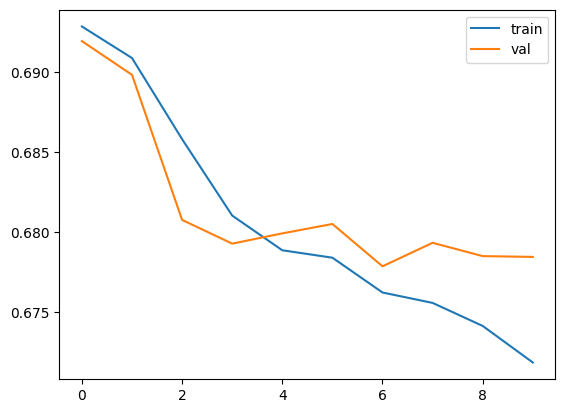

In [205]:
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='val')
plt.legend()

**Regression**

In [162]:
df = pd.read_csv(DATA_DIR, names=['time', 'low', 'high', 'open', 'close', 'volume'])

df = df[['close', 'volume']]

close_vals = df['close']
fut_vals = df['close'].shift(-FUTURE)

for col in df.columns:
    df[col] = df[col].pct_change()
    df[col].dropna(inplace=True)

df.dropna(inplace=True)
df.head()

,close,volume
1,-0.000334,12.126169
2,-0.001228,-0.599260
3,0.000000,-0.545342
4,0.000088,-0.463713
5,0.000003,0.979947


In [81]:
df['future'] = df['close'].shift(-FUTURE)
df.tail()

,close,volume,future
97719,0.000022,-0.669713,0.000071
97720,0.000206,0.302330,0.000000
97721,0.000000,0.019222,NaN
97722,0.000071,2.567295,NaN
97723,0.000000,-0.859125,NaN


In [82]:
df.dropna(inplace=True)
df.tail()

,close,volume,future
97716,0.000042,-0.304025,0.000022
97717,0.000255,0.326340,0.000206
97718,0.000432,0.801966,0.000000
97719,0.000022,-0.669713,0.000071
97720,0.000206,0.302330,0.000000


In [97]:
data_len = math.floor(len(df) - SEQ_LEN) + 1
val_len = int(data_len * VAL_RATIO)

In [99]:
data_len, val_len

(97661, 4883)

In [100]:
val_len_row_num = val_len - 1 + SEQ_LEN
val_len_row_num

4942

In [138]:
scaler = StandardScaler()

data_train_nrm = scaler.fit_transform(df.values[:-val_len_row_num, :2])
data_val_nrm = scaler.transform(df.values[-val_len_row_num:, :2])

data = np.concatenate((data_train_nrm, data_val_nrm), 0)

In [139]:
data_train_nrm.shape, data_val_nrm.shape

((92778, 2), (4942, 2))

In [140]:
data_train_nrm.std(0), data_train_nrm.mean(0).round(2)

(array([1., 1.]), array([-0., -0.]))

In [143]:
data = np.concatenate((data, df.values[:, 2].reshape(-1, 1)), 1)
data.shape

(97720, 3)

In [144]:
box = deque(maxlen=SEQ_LEN)
boxes = []

for smp in data:
    box.append(smp[:-1])
    if len(box) == SEQ_LEN:
        boxes.append([np.array(box), smp[-1]])

len(boxes)

97661

In [145]:
data_train = boxes[:-val_len]
data_val = boxes[-val_len:]

In [146]:
x_train, y_train = np.array([box for box, _ in data_train]), np.array([t for _, t in data_train])
x_val, y_val = np.array([box for box, _ in data_val]), np.array([t for _, t in data_val])

In [163]:
close_vals = close_vals.drop(0)[SEQ_LEN - 1:-FUTURE]
len(close_vals)

97661

In [148]:
shuffle(x_train, y_train)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((92778, 60, 2), (92778,), (4883, 60, 2), (4883,))

In [149]:
model = Sequential()

model.add(CuDNNLSTM(128, input_shape=x_train.shape[1:], return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128, return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics='mae')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 60, 128)           67584     
                                                                 
 dropout_3 (Dropout)         (None, 60, 128)           0         
                                                                 
 cu_dnnlstm_4 (CuDNNLSTM)    (None, 60, 128)           132096    
                                                                 
 dropout_4 (Dropout)         (None, 60, 128)           0         
                                                                 
 cu_dnnlstm_5 (CuDNNLSTM)    (None, 128)               132096    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [150]:
results = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val),
                      callbacks=EarlyStopping(patience=5, restore_best_weights=True))

Epoch 1/10
1450/1450 [==============================] - 23s 13ms/step - loss: 9.1327e-06 - mae: 0.0010 - val_loss: 6.2083e-07 - val_mae: 4.4084e-04
Epoch 2/10
1450/1450 [==============================] - 17s 12ms/step - loss: 9.3506e-07 - mae: 5.5773e-04 - val_loss: 5.9386e-07 - val_mae: 4.1229e-04
Epoch 3/10
1450/1450 [==============================] - 17s 12ms/step - loss: 9.0003e-07 - mae: 5.6438e-04 - val_loss: 1.1259e-06 - val_mae: 8.5120e-04
Epoch 4/10
1450/1450 [==============================] - 17s 12ms/step - loss: 8.7310e-07 - mae: 5.4712e-04 - val_loss: 5.8673e-07 - val_mae: 3.9902e-04
Epoch 5/10
1450/1450 [==============================] - 17s 12ms/step - loss: 8.9218e-07 - mae: 5.6245e-04 - val_loss: 5.6851e-07 - val_mae: 3.3580e-04
Epoch 6/10
1450/1450 [==============================] - 17s 12ms/step - loss: 8.4404e-07 - mae: 5.2722e-04 - val_loss: 5.8615e-07 - val_mae: 3.8826e-04
Epoch 7/10
1450/1450 [==============================] - 17s 12ms/step - loss: 8.2775e-07 - m

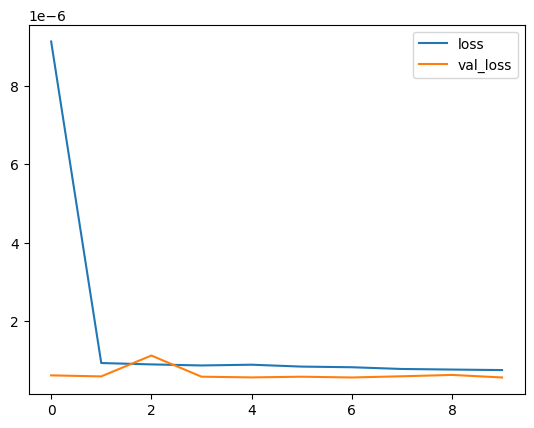

In [151]:
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [152]:
yhat_val = model.predict(x_val)

153/153 [==============================] - 1s 5ms/step


In [153]:
yhat_val_full = []

for i in range(FUTURE, len(yhat_val)):
  last_val = close_vals.values[-val_len + i]
  for j in reversed(range(FUTURE)):
    fut_now = last_val * (1 + yhat_val[i - j])
    last_val = fut_now
  yhat_val_full.append(fut_now)

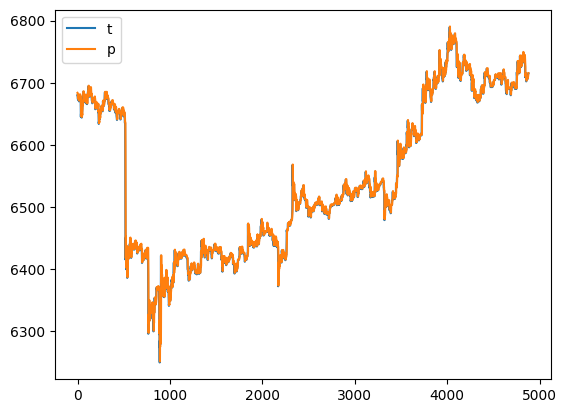

In [155]:
plt.plot(fut_vals.values[-val_len + FUTURE:], label='t')
plt.plot(yhat_val_full, label='p')
plt.legend()
plt.show()

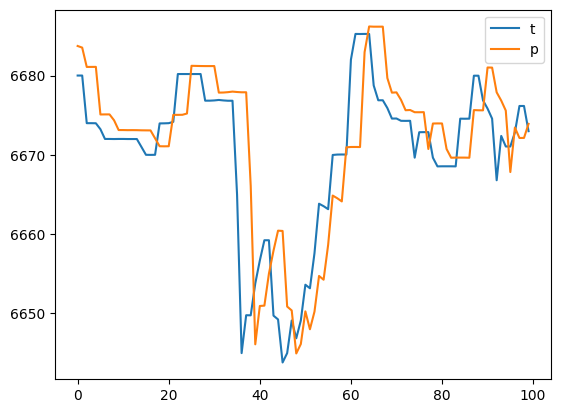

In [156]:
SMALL_SHOW_LEN = 100
plt.plot(fut_vals.values[-val_len + FUTURE:-val_len + FUTURE + SMALL_SHOW_LEN], label='t')
plt.plot(yhat_val_full[:SMALL_SHOW_LEN], label='p')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [158]:
len(fut_vals[-val_len + FUTURE:]), len(yhat_val_full)

(4880, 4880)

In [159]:
mean_absolute_error(fut_vals.values[-val_len + FUTURE:], yhat_val_full)

4.721365678105773

In [160]:
mean_squared_error(fut_vals.values[-val_len + FUTURE:], yhat_val_full)

81.24221128822468

In [161]:
r2_score(fut_vals.values[-val_len + FUTURE:], yhat_val_full)

0.9946149667942182